In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### 欧拉插值函数可视化

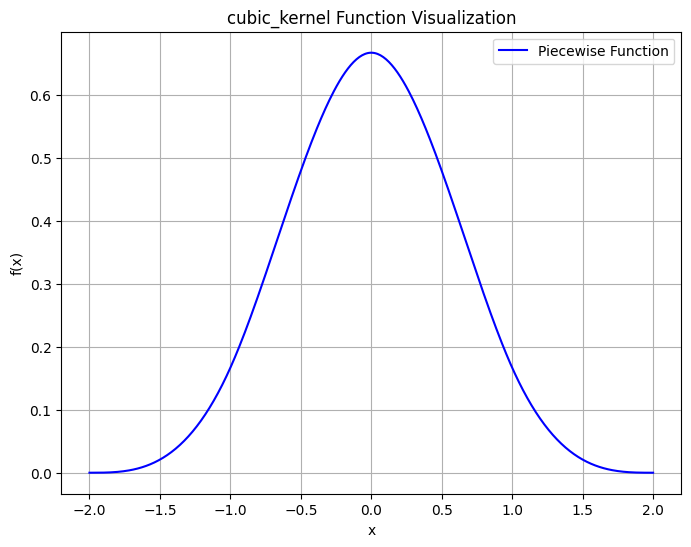

In [2]:
# 定义分段函数
def cubic_kernel(x):
    if -1 <= x < 1:
        return 0.5*np.abs(x)**3-np.abs(x)**2+2.0/3
    elif 1 <= x <= 2 or -2 <= x < -1:
        return 1/6*(2-np.abs(x))**3
    else:
        return 0

# 生成 x 值
x_values = np.linspace(-2, 2, 400)
y_values = [cubic_kernel(x) for x in x_values]

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Piecewise Function', color='blue')
plt.title('cubic_kernel Function Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


In [3]:
import warp as wp

@wp.kernel
def print_kernel():
    print("Hello, Warp!")
    base_pos_x = wp.int(grid_pos[0] - 0.5)
    base_pos_y = wp.int(grid_pos[1] - 0.5)
    base_pos_z = wp.int(grid_pos[2] - 0.5)
    fx = grid_pos - wp.vec3(
        wp.float(base_pos_x), wp.float(base_pos_y), wp.float(base_pos_z)
    )
    wa = wp.vec3(1.5) - fx
    wb = fx - wp.vec3(1.0)
    wc = fx - wp.vec3(0.5)
    w = wp.mat33(
        wp.cw_mul(wa, wa) * 0.5,
        wp.vec3(0.0, 0.0, 0.0) - wp.cw_mul(wb, wb) + wp.vec3(0.75),
        wp.cw_mul(wc, wc) * 0.5,
    )

## Velocity grid damping scale test

In [4]:
import numpy as np
damping_scale=np.array([0.9999])
np.power(damping_scale,50000)

array([0.00673626])

## point_cloud.ply data visualization

In [5]:
from plyfile import PlyData, PlyElement
ficus_data=PlyData.read("/home/jiahao/PhysGaussian/model/ficus_whitebg-trained/point_cloud/iteration_30000/point_cloud.ply")
print("header for ficus data:")
print(ficus_data.header)

header for ficus data:
ply
format binary_little_endian 1.0
element vertex 203930
property float x
property float y
property float z
property float nx
property float ny
property float nz
property float f_dc_0
property float f_dc_1
property float f_dc_2
property float f_rest_0
property float f_rest_1
property float f_rest_2
property float f_rest_3
property float f_rest_4
property float f_rest_5
property float f_rest_6
property float f_rest_7
property float f_rest_8
property float f_rest_9
property float f_rest_10
property float f_rest_11
property float f_rest_12
property float f_rest_13
property float f_rest_14
property float f_rest_15
property float f_rest_16
property float f_rest_17
property float f_rest_18
property float f_rest_19
property float f_rest_20
property float f_rest_21
property float f_rest_22
property float f_rest_23
property float f_rest_24
property float f_rest_25
property float f_rest_26
property float f_rest_27
property float f_rest_28
property float f_rest_29
property

In [6]:
ficus_xyz = np.stack((np.asarray(ficus_data.elements[0]["x"]),
                np.asarray(ficus_data.elements[0]["y"]),
                np.asarray(ficus_data.elements[0]["z"])),  axis=1)
print("ficus_xyz shape:",ficus_xyz.shape)

ficus_xyz shape: (203930, 3)


In [7]:
print("max point:",ficus_xyz.max(axis=0))
print("min point:",ficus_xyz.min(axis=0))

max point: [0.5523032  0.57470113 1.1410387 ]
min point: [-0.3735972 -0.8557943 -1.0332751]


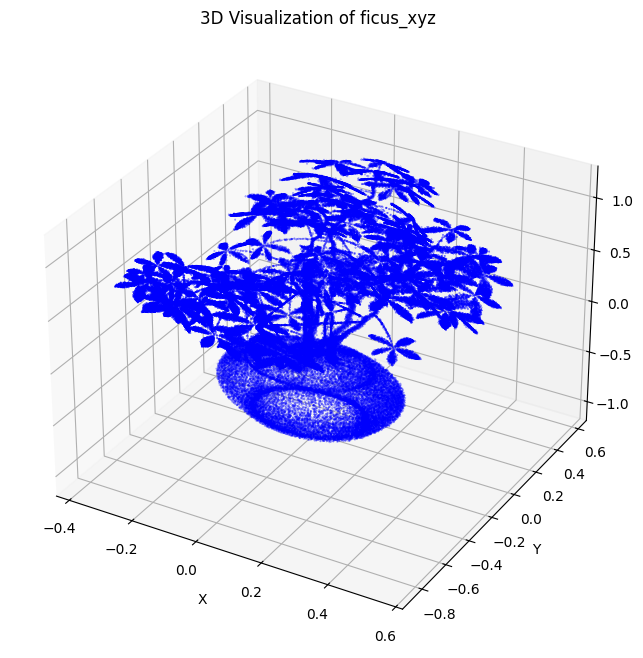

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ficus_xyz[:, 0], ficus_xyz[:, 1], ficus_xyz[:, 2], s=0.1,c='b', marker='o')

ax.set_title('3D Visualization of ficus_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [9]:
def info_ply(ply_path):
    ply_data=PlyData.read(ply_path)
    # print("header for ply data:")
    # print(ply_data.header)
    xyz = np.stack((np.asarray(ply_data.elements[0]["x"]),
                np.asarray(ply_data.elements[0]["y"]),
                np.asarray(ply_data.elements[0]["z"])),  axis=1)
    print("xyz shape:",xyz.shape)
    print("max point:",xyz.max(axis=0))
    print("min point:",xyz.min(axis=0))

    return xyz

In [10]:
point_cloud_path="/home/jiahao/PhysGaussian/model/ficus_whitebg-trained/point_cloud/iteration_30000/point_cloud.ply"
print("info for ficus data:")
ficus_xyz=info_ply(point_cloud_path)
transformed_ficus_path="./log_ficus/transformed_particles.ply"
print("info for transformed ficus data:")
transformed_ficus_xyz=info_ply(transformed_ficus_path)

info for ficus data:
xyz shape: (203930, 3)
max point: [0.5523032  0.57470113 1.1410387 ]
min point: [-0.3735972 -0.8557943 -1.0332751]
info for transformed ficus data:
xyz shape: (171553, 3)
max point: [1.2130644 1.3291254 1.5      ]
min point: [0.7869355 0.6708746 0.5      ]


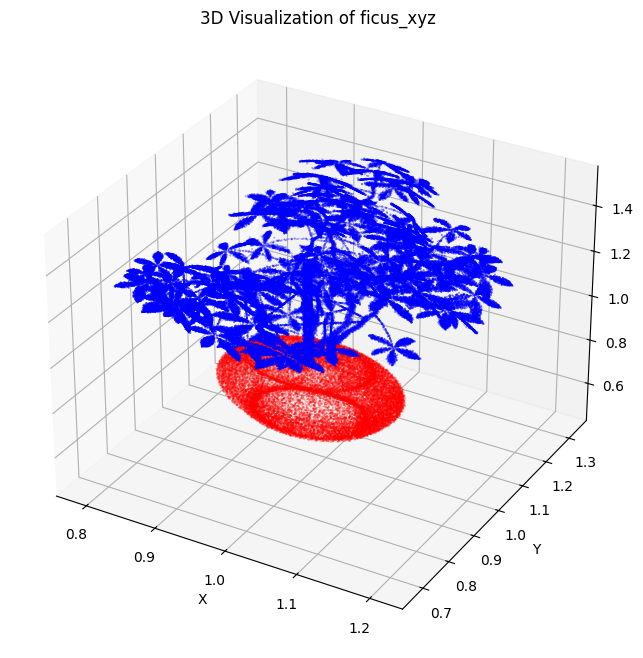

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 根据 x, y, z 值设置颜色
colors = np.where((0.5 < transformed_ficus_xyz[:, 0]) & (transformed_ficus_xyz[:, 0] < 1.5) &
                  (0.5 < transformed_ficus_xyz[:, 1]) & (transformed_ficus_xyz[:, 1] < 1.5) &
                  (0.22 < transformed_ficus_xyz[:, 2]) & (transformed_ficus_xyz[:, 2] < 0.78), 'r', 'b')

ax.scatter(transformed_ficus_xyz[:, 0], transformed_ficus_xyz[:, 1], transformed_ficus_xyz[:, 2], s=0.1, c=colors, marker='o')

ax.set_title('3D Visualization of ficus_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## VaseDeck Visualization

In [12]:
vasedeck_path="./log_vasedeck/init_particles.ply"
print("info for vasedeck data:")
vasedeck_xyz=info_ply(vasedeck_path)
rotated_vasedeck_path="./log_vasedeck/rotated_particles.ply"
print("info for rotated vasedeck data:")
rotated_vasedeck_xyz=info_ply(rotated_vasedeck_path)
transformed_vasedeck_path="./log_vasedeck/transformed_particles.ply"
print("info for transformed vasedeck data:")
transformed_vasedeck_xyz=info_ply(transformed_vasedeck_path)

info for vasedeck data:
xyz shape: (940838, 3)
max point: [37.57585  36.41761  81.802536]
min point: [-68.01123  -60.662582 -21.069431]
info for rotated vasedeck data:
xyz shape: (940838, 3)
max point: [37.57585    1.3923278 39.138603 ]
min point: [ -68.01123   -19.210466 -100.58505 ]
info for transformed vasedeck data:
xyz shape: (55364, 3)
max point: [1.4958875 1.4665674 1.5      ]
min point: [0.50411254 0.5334327  0.5       ]


In [13]:
sim_area= np.array([-2.25,2.25,-5.01,-0.81,-1.95,2.55])
mask_init=np.ones(vasedeck_xyz.shape[0],dtype=bool)
mask_rotated=np.ones(vasedeck_xyz.shape[0],dtype=bool)
for i in range(3):
    mask_init = mask_init & (sim_area[2*i] < vasedeck_xyz[:, i]) & (vasedeck_xyz[:, i] < sim_area[2*i+1])
    mask_rotated=mask_rotated & (sim_area[2*i] < rotated_vasedeck_xyz[:, i]) & (rotated_vasedeck_xyz[:, i] < sim_area[2*i+1])
# vasedeck_xyz = vasedeck_xyz[mask_init]
# vasedeck_xyz.shape
rotated_vasedeck_xyz = rotated_vasedeck_xyz[mask_rotated]
rotated_vasedeck_xyz.shape

(55364, 3)

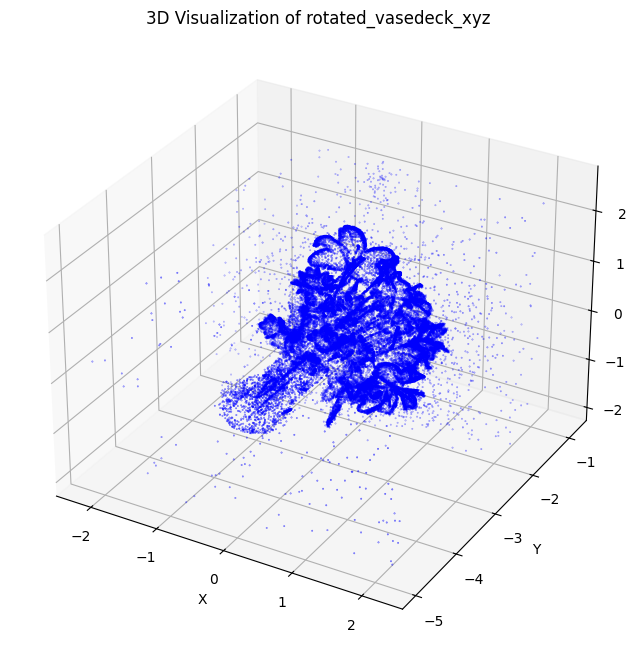

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rotated_vasedeck_xyz[:, 0], rotated_vasedeck_xyz[:, 1], rotated_vasedeck_xyz[:, 2], s=0.1,c='b', marker='o')

ax.set_title('3D Visualization of rotated_vasedeck_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

vec_from_center shape: (55364, 3)
proj_length shape: (55364,)


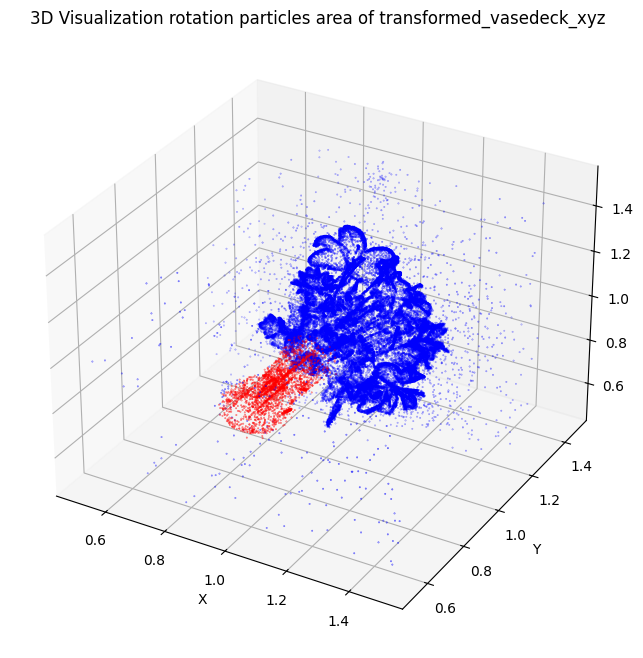

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 定义圆柱体的参数
cylinder_center = np.array([1.025, 0.7, 0.975])
cylinder_axis = np.array([0, 1, 0])
cylinder_radius = 0.1
cylinder_half_height = 0.2

# 计算每个点到圆柱体轴的距离
vec_from_center = transformed_vasedeck_xyz - cylinder_center
print("vec_from_center shape:",vec_from_center.shape)
proj_length = np.dot(vec_from_center, cylinder_axis)
print("proj_length shape:",proj_length.shape)
proj_point = np.outer(proj_length, cylinder_axis)
dist_to_axis = np.linalg.norm(vec_from_center - proj_point, axis=1)

# 创建颜色掩码
colors = np.where((dist_to_axis <= cylinder_radius) & 
                  (np.abs(proj_length) <= cylinder_half_height), 'r', 'b')
ax.scatter(transformed_vasedeck_xyz[:, 0], transformed_vasedeck_xyz[:, 1], transformed_vasedeck_xyz[:, 2], s=0.1,c=colors, marker='o')

ax.set_title('3D Visualization rotation particles area of transformed_vasedeck_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

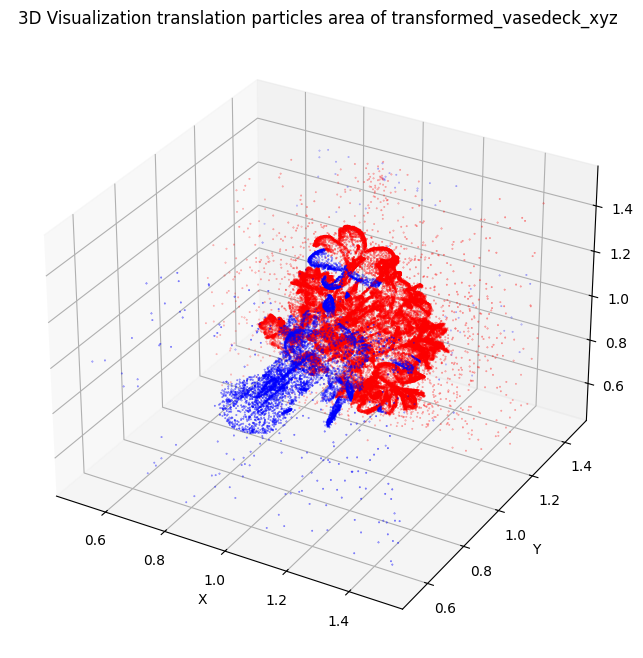

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 根据 x, y, z 值设置颜色
colors = np.where((0 < transformed_vasedeck_xyz[:, 0]) & (transformed_vasedeck_xyz[:, 0] < 2.0) &
                  (1.0 < transformed_vasedeck_xyz[:, 1]) & (transformed_vasedeck_xyz[:, 1] < 1.4) &
                  (0 < transformed_vasedeck_xyz[:, 2]) & (transformed_vasedeck_xyz[:, 2] < 2.0), 'r', 'b')

ax.scatter(transformed_vasedeck_xyz[:, 0], transformed_vasedeck_xyz[:, 1], transformed_vasedeck_xyz[:, 2], s=0.1,c=colors, marker='o')

ax.set_title('3D Visualization translation particles area of transformed_vasedeck_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Pillow2Sofa Visualization

In [31]:
pillow2sofa_path="./log_pillow2sofa/init_particles.ply"
print("info for pillow2sofa data:")
pillow2sofa_xyz=info_ply(pillow2sofa_path)
rotated_pillow2sofa_path="./log_pillow2sofa/rotated_particles.ply"
print("info for rotated pillow2sofa data:")
rotated_pillow2sofa_xyz=info_ply(rotated_pillow2sofa_path)
transformed_pillow2sofa_path="./log_pillow2sofa/transformed_particles.ply"
print("info for transformed pillow2sofa data:")
transformed_pillow2sofa_xyz=info_ply(transformed_pillow2sofa_path)
filled_pillow2sofa_path="./log_pillow2sofa/filled_particles.ply"
print("info for filled pillow2sofa data:")
filled_pillow2sofa_xyz=info_ply(filled_pillow2sofa_path)

info for pillow2sofa data:
xyz shape: (624337, 3)
max point: [0.6037212 0.5768941 1.2628081]
min point: [-0.6215851 -0.4965348 -1.2547684]
info for rotated pillow2sofa data:
xyz shape: (624337, 3)
max point: [0.6037212 0.5768941 1.2628081]
min point: [-0.6215851 -0.4965348 -1.2547684]
info for transformed pillow2sofa data:
xyz shape: (624324, 3)
max point: [1.3300691 1.2891569 1.5      ]
min point: [0.6699309 0.7108431 0.5      ]
info for filled pillow2sofa data:
xyz shape: (695984, 3)
max point: [1.3300691 1.2891569 1.5      ]
min point: [0.6699309 0.7108431 0.5      ]


In [18]:
sim_area= np.array([-0.65,0.65,-0.6,0.6,-1,1])
mask_init=np.ones(pillow2sofa_xyz.shape[0],dtype=bool)
mask_rotated=np.ones(pillow2sofa_xyz.shape[0],dtype=bool)
for i in range(3):
    mask_init = mask_init & (sim_area[2*i] < pillow2sofa_xyz[:, i]) & (pillow2sofa_xyz[:, i] < sim_area[2*i+1])
    mask_rotated=mask_rotated & (sim_area[2*i] < rotated_pillow2sofa_xyz[:, i]) & (rotated_pillow2sofa_xyz[:, i] < sim_area[2*i+1])
# pillow2sofa_xyz = pillow2sofa_xyz[mask_init]
# pillow2sofa_xyz.shape
rotated_pillow2sofa_xyz = rotated_pillow2sofa_xyz[mask_rotated]
rotated_pillow2sofa_xyz.shape

(624324, 3)

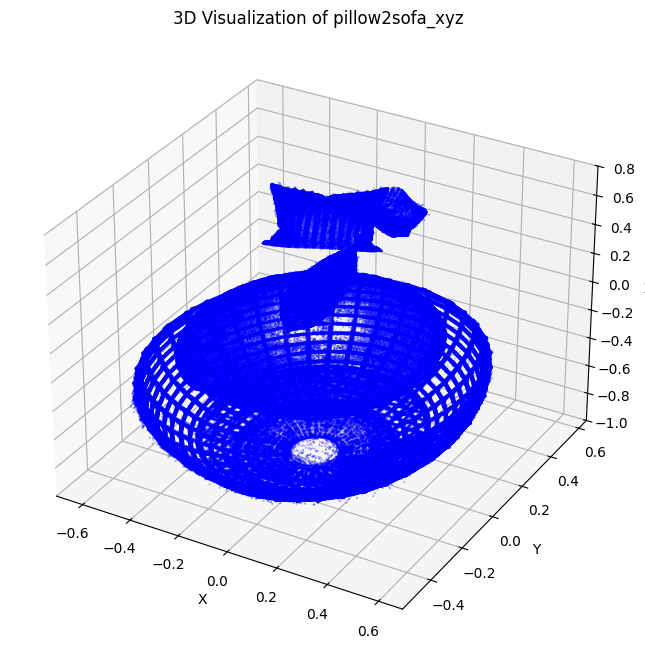

In [19]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 过滤掉 z 轴刻度范围之外的点
filtered_pillow2sofa_xyz = pillow2sofa_xyz[(pillow2sofa_xyz[:, 2] >= -1.0) & (pillow2sofa_xyz[:, 2] <= 0.8)]

ax.scatter(filtered_pillow2sofa_xyz[:, 0], filtered_pillow2sofa_xyz[:, 1], filtered_pillow2sofa_xyz[:, 2], s=0.05, c='b', marker='o')

ax.set_title('3D Visualization of pillow2sofa_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim(-1.0, 0.8)

plt.show()


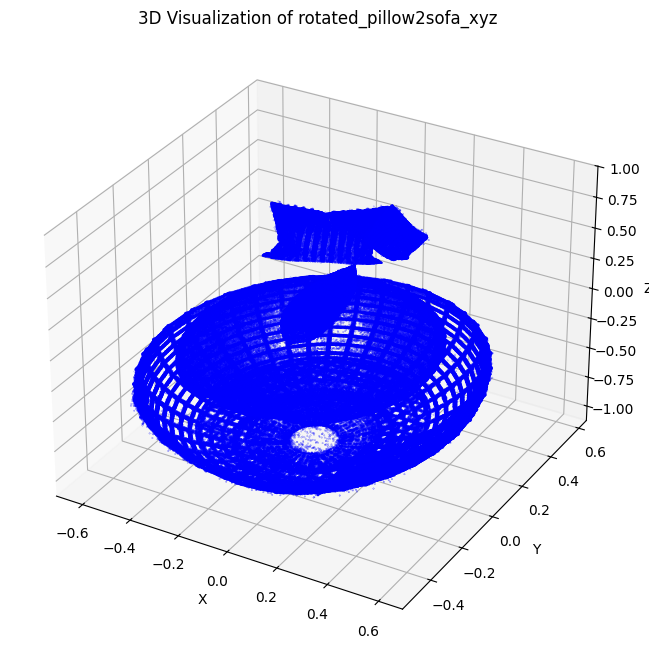

In [20]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rotated_pillow2sofa_xyz[:, 0], rotated_pillow2sofa_xyz[:, 1], rotated_pillow2sofa_xyz[:, 2], s=0.05,c='b', marker='o')

ax.set_title('3D Visualization of rotated_pillow2sofa_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

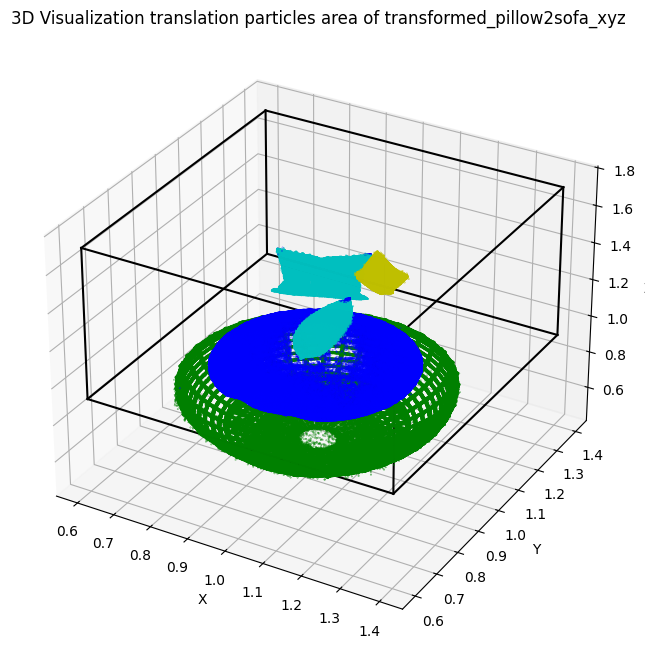

In [32]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 根据 x, y, z 值设置颜色
conditions = [
    {"point": [1, 1, 0.5], "size": [1.0, 1.0, 0.05], "color": 'r'}, #0<t<1e3
    {"point": [1, 1, 0.5], "size": [1, 1, 0.4], "color": 'g'},  # 0<t<1e3
    {"point": [1, 1, 1.2], "size": [1.0, 1.0, 0.12], "color": 'c'}, #0<t<0.5
    {"point": [1, 1, 1.45], "size": [1.0, 1.0, 0.1], "color": 'y'} # 0<t<1
]

colors = np.full(transformed_pillow2sofa_xyz.shape[0], 'b')

for condition in conditions:
    point = condition["point"]
    size = condition["size"]
    color = condition["color"]
    mask = (
        (np.abs(transformed_pillow2sofa_xyz[:, 0] - point[0]) <= size[0] ) &
        (np.abs(transformed_pillow2sofa_xyz[:, 1] - point[1]) <= size[1] ) &
        (np.abs(transformed_pillow2sofa_xyz[:, 2] - point[2]) <= size[2] )
    )
    colors[mask] = color

# 绘制边界框
boundary = [0.6, 1.4, 0.6, 1.4, 0.92, 1.72]
x_min, x_max, y_min, y_max, z_min, z_max = boundary

# 绘制边界框的 12 条边
edges = [
    [[x_min, y_min, z_min], [x_max, y_min, z_min]],
    [[x_min, y_max, z_min], [x_max, y_max, z_min]],
    [[x_min, y_min, z_max], [x_max, y_min, z_max]],
    [[x_min, y_max, z_max], [x_max, y_max, z_max]],
    [[x_min, y_min, z_min], [x_min, y_max, z_min]],
    [[x_max, y_min, z_min], [x_max, y_max, z_min]],
    [[x_min, y_min, z_max], [x_min, y_max, z_max]],
    [[x_max, y_min, z_max], [x_max, y_max, z_max]],
    [[x_min, y_min, z_min], [x_min, y_min, z_max]],
    [[x_max, y_min, z_min], [x_max, y_min, z_max]],
    [[x_min, y_max, z_min], [x_min, y_max, z_max]],
    [[x_max, y_max, z_min], [x_max, y_max, z_max]],
]

for edge in edges:
    ax.plot3D(*zip(*edge), color="k")

ax.scatter(transformed_pillow2sofa_xyz[:, 0], transformed_pillow2sofa_xyz[:, 1], transformed_pillow2sofa_xyz[:, 2], s=0.1, c=colors, marker='o')

ax.set_title('3D Visualization translation particles area of transformed_pillow2sofa_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [22]:
np.full(5,1)

array([1, 1, 1, 1, 1])

In [23]:
ikun_path="./log_ikun/init_particles.ply"
print("info for ikun data:")
ikun_xyz=info_ply(ikun_path)
transformed_ikun_path="./log_ikun/transformed_particles.ply"
print("info for transformed ikun data:")
transformed_ikun_xyz=info_ply(transformed_ikun_path)

info for ikun data:
xyz shape: (8198, 3)
max point: [0.3784226  0.45610958 0.3247927 ]
min point: [-0.40378895 -0.52011603 -0.32534495]
info for transformed ikun data:
xyz shape: (8198, 3)
max point: [1.4006305 1.5       1.3329854]
min point: [0.59936947 0.5        0.6670146 ]


In [24]:
ikun_rgba_data=PlyData.read("/home/jiahao/PhysGaussian/model/ikun_rgba_whitebg-trained/point_cloud/iteration_7000/point_cloud.ply")
print("header for ikun_rgba data:")
print(ikun_rgba_data.header)

header for ikun_rgba data:
ply
format binary_little_endian 1.0
element vertex 9505
property float x
property float y
property float z
property float f_dc_0
property float f_dc_1
property float f_dc_2
property float opacity
property float scale_0
property float scale_1
property float scale_2
property float rot_0
property float rot_1
property float rot_2
property float rot_3
end_header


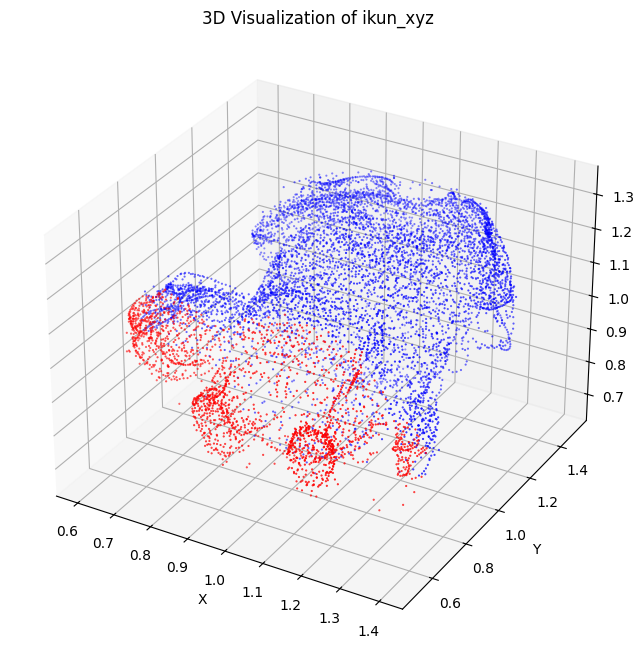

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 根据 x, y, z 值设置颜色
colors = np.where((0.5 < transformed_ikun_xyz[:, 0]) & (transformed_ikun_xyz[:, 0] < 1.5) &
                  (0.23 < transformed_ikun_xyz[:, 1]) & (transformed_ikun_xyz[:, 1] < 0.77) &
                  (0.5 < transformed_ikun_xyz[:, 2]) & (transformed_ikun_xyz[:, 2] < 1.5), 'r', 'b')

ax.scatter(transformed_ikun_xyz[:, 0], transformed_ikun_xyz[:, 1], transformed_ikun_xyz[:, 2], s=0.3,c=colors, marker='o')

ax.set_title('3D Visualization of ikun_xyz')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Bake Gaussian data Analysis

In [26]:
paladin_data=PlyData.read("/home/jiahao/PhysGaussian/model/paladin_whitebg-trained/point_cloud/iteration_7000/point_cloud.ply")
print("header for paladin data:")
print(paladin_data.header)

header for paladin data:
ply
format binary_little_endian 1.0
element vertex 163763
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
property float f_dc_0
property float f_dc_1
property float f_dc_2
property float f_rest_0
property float f_rest_1
property float f_rest_2
property float f_rest_3
property float f_rest_4
property float f_rest_5
property float f_rest_6
property float f_rest_7
property float f_rest_8
property float f_rest_9
property float f_rest_10
property float f_rest_11
property float f_rest_12
property float f_rest_13
property float f_rest_14
property float f_rest_15
property float f_rest_16
property float f_rest_17
property float f_rest_18
property float f_rest_19
property float f_rest_20
property float f_rest_21
property float f_rest_22
property float f_rest_23
property float f_rest_24
property float f_rest_25
property float f_rest_26
property float f_rest_27
property float f_rest_28
property float f_rest_29


In [27]:
opacities = np.asarray(paladin_data.elements[0]["opacity"])[..., np.newaxis]
opacities.shape

(163763, 1)

In [28]:
gradio_data=PlyData.read("./gradio_output.ply")
print("gradio_rose.shape:",gradio_data.elements[0].data.shape)
print("header for gradio data:")
print(gradio_data.header)

gradio_rose.shape: (31423,)
header for gradio data:
ply
format binary_little_endian 1.0
element vertex 31423
property float x
property float y
property float z
property float f_dc_0
property float f_dc_1
property float f_dc_2
property float opacity
property float scale_0
property float scale_1
property float scale_2
property float rot_0
property float rot_1
property float rot_2
property float rot_3
end_header


In [29]:
import numpy as np
# 生成两个随机数矩阵
matrix_a = np.random.rand(3, 3)
matrix_b = np.random.rand(3, 3)

# 进行矩阵乘法
result_matrix = np.dot(matrix_a, matrix_b)
print("Matrix A:\n", matrix_a)
print("Matrix B:\n", matrix_b)
print("Result of matrix multiplication:\n", result_matrix)
print("matrix_a@matrix_b:\n",matrix_a@matrix_b)

Matrix A:
 [[0.38536432 0.41974582 0.99282412]
 [0.47808054 0.9628474  0.86072753]
 [0.8608627  0.96510253 0.60793795]]
Matrix B:
 [[0.08440792 0.40284828 0.5002161 ]
 [0.17488541 0.43527005 0.72441344]
 [0.07513766 0.17086405 0.25252704]]
Result of matrix multiplication:
 [[0.1805337  0.50758409 0.74754989]
 [0.27341479 0.75875995 1.15400016]
 [0.28712501 0.87075203 1.2832714 ]]
matrix_a@matrix_b:
 [[0.1805337  0.50758409 0.74754989]
 [0.27341479 0.75875995 1.15400016]
 [0.28712501 0.87075203 1.2832714 ]]


In [30]:
np.matmul(matrix_a,matrix_b)

array([[0.1805337 , 0.50758409, 0.74754989],
       [0.27341479, 0.75875995, 1.15400016],
       [0.28712501, 0.87075203, 1.2832714 ]])